# Departamento de vendas

- Base de dados: https://www.kaggle.com/c/rossmann-store-sales/data

## Importação das bibliotecas e base de dados

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import datetime

### Infiormações das lojas

 * id: Um ID que representa um par (Loja, Data) dentro do conjunto de teste.
* Store: Um ID único para cada loja.
* Sales: O faturamento em um determinado dia (é isso que você está prevendo).
* Customers: O número de clientes em um determinado dia.
* Open: Um indicador se a loja estava aberta: 0 = fechada, 1 = aberta.
StateHoliday: Indica um feriado estadual. Normalmente, todas as lojas, com poucas exceções, estão fechadas em feriados estaduais. Observe que todas as escolas estão fechadas em feriados públicos e finais de semana. a = feriado público, b = feriado de Páscoa, c = Natal, 0 = nenhum.
* SchoolHoliday: Indica se (Loja, Data) foi afetada pelo fechamento das escolas públicas.
* StoreType: Diferencia entre 4 modelos diferentes de loja: a, b, c, d.
* Assortment: Descreve o nível de variedade de produtos: a = básico, b = extra, c = estendido.
* CompetitionDistance: Distância em metros para a loja concorrente mais próxima.
* CompetitionOpenSince[Month/Year]: Fornece o ano e mês aproximados em que o concorrente mais próximo foi aberto.
* Promo: Indica se uma loja está fazendo uma promoção naquele dia.
* Promo2: Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = a loja não está participando, 1 = a loja está participando.
* Promo2Since[Year/Week]: Descreve o ano e a semana do calendário em que a loja começou a participar do Promo2.
* PromoInterval: Descreve os intervalos consecutivos em que o Promo2 é iniciado, mencionando os meses em que a promoção é iniciada novamente. Por exemplo, "Feb, May, Aug, Nov" significa que cada rodada começa em * fevereiro, maio, agosto, novembro de qualquer ano para aquela loja.

### Dados das vendas

In [3]:
sales_train_df = pd.read_csv('train.csv')

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\1244316221.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_train_df = pd.read_csv('train.csv')


In [4]:
sales_train_df.shape

(1017209, 9)

In [5]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


Temos um total de 1115 filiais dessa loja no dataframe

In [6]:
sales_train_df['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

In [7]:
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [8]:
sales_train_df['Open'].unique()

array([1, 0], dtype=int64)

In [9]:
sales_train_df['Promo'].unique()

array([1, 0], dtype=int64)

In [10]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [11]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0], dtype=int64)

OS registros começam em 2013-01-01	e vão até 2015-07-31

In [12]:
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [13]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* O maior faturamento de uma loja em um dia foi 41.511
* O faturamento médio de uma loja por dia é de 5.773,819
* O número médio de clientes e de 633
* O máximo de clientes em um dia foi de 7.388

In [14]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Dados das lojas

In [15]:
store_info_df = pd.read_csv('store.csv')

In [16]:
store_info_df.shape  

(1115, 10)

In [17]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


## Exploração dos dados

### Dados das vendas

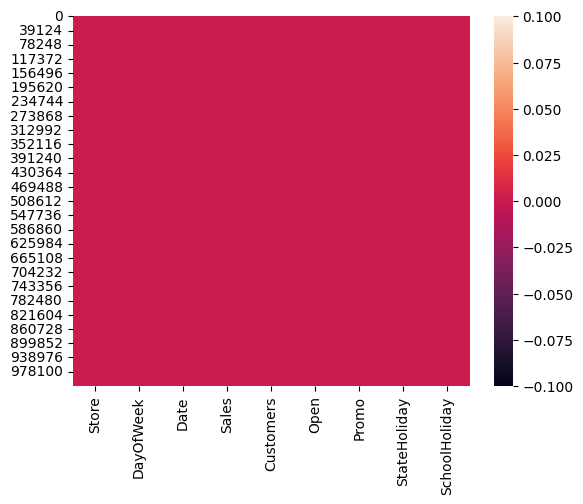

In [20]:
sns.heatmap(sales_train_df.isnull());

In [21]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'DayOfWeek'}>,
        <AxesSubplot: title={'center': 'Sales'}>],
       [<AxesSubplot: title={'center': 'Customers'}>,
        <AxesSubplot: title={'center': 'Open'}>,
        <AxesSubplot: title={'center': 'Promo'}>],
       [<AxesSubplot: title={'center': 'SchoolHoliday'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

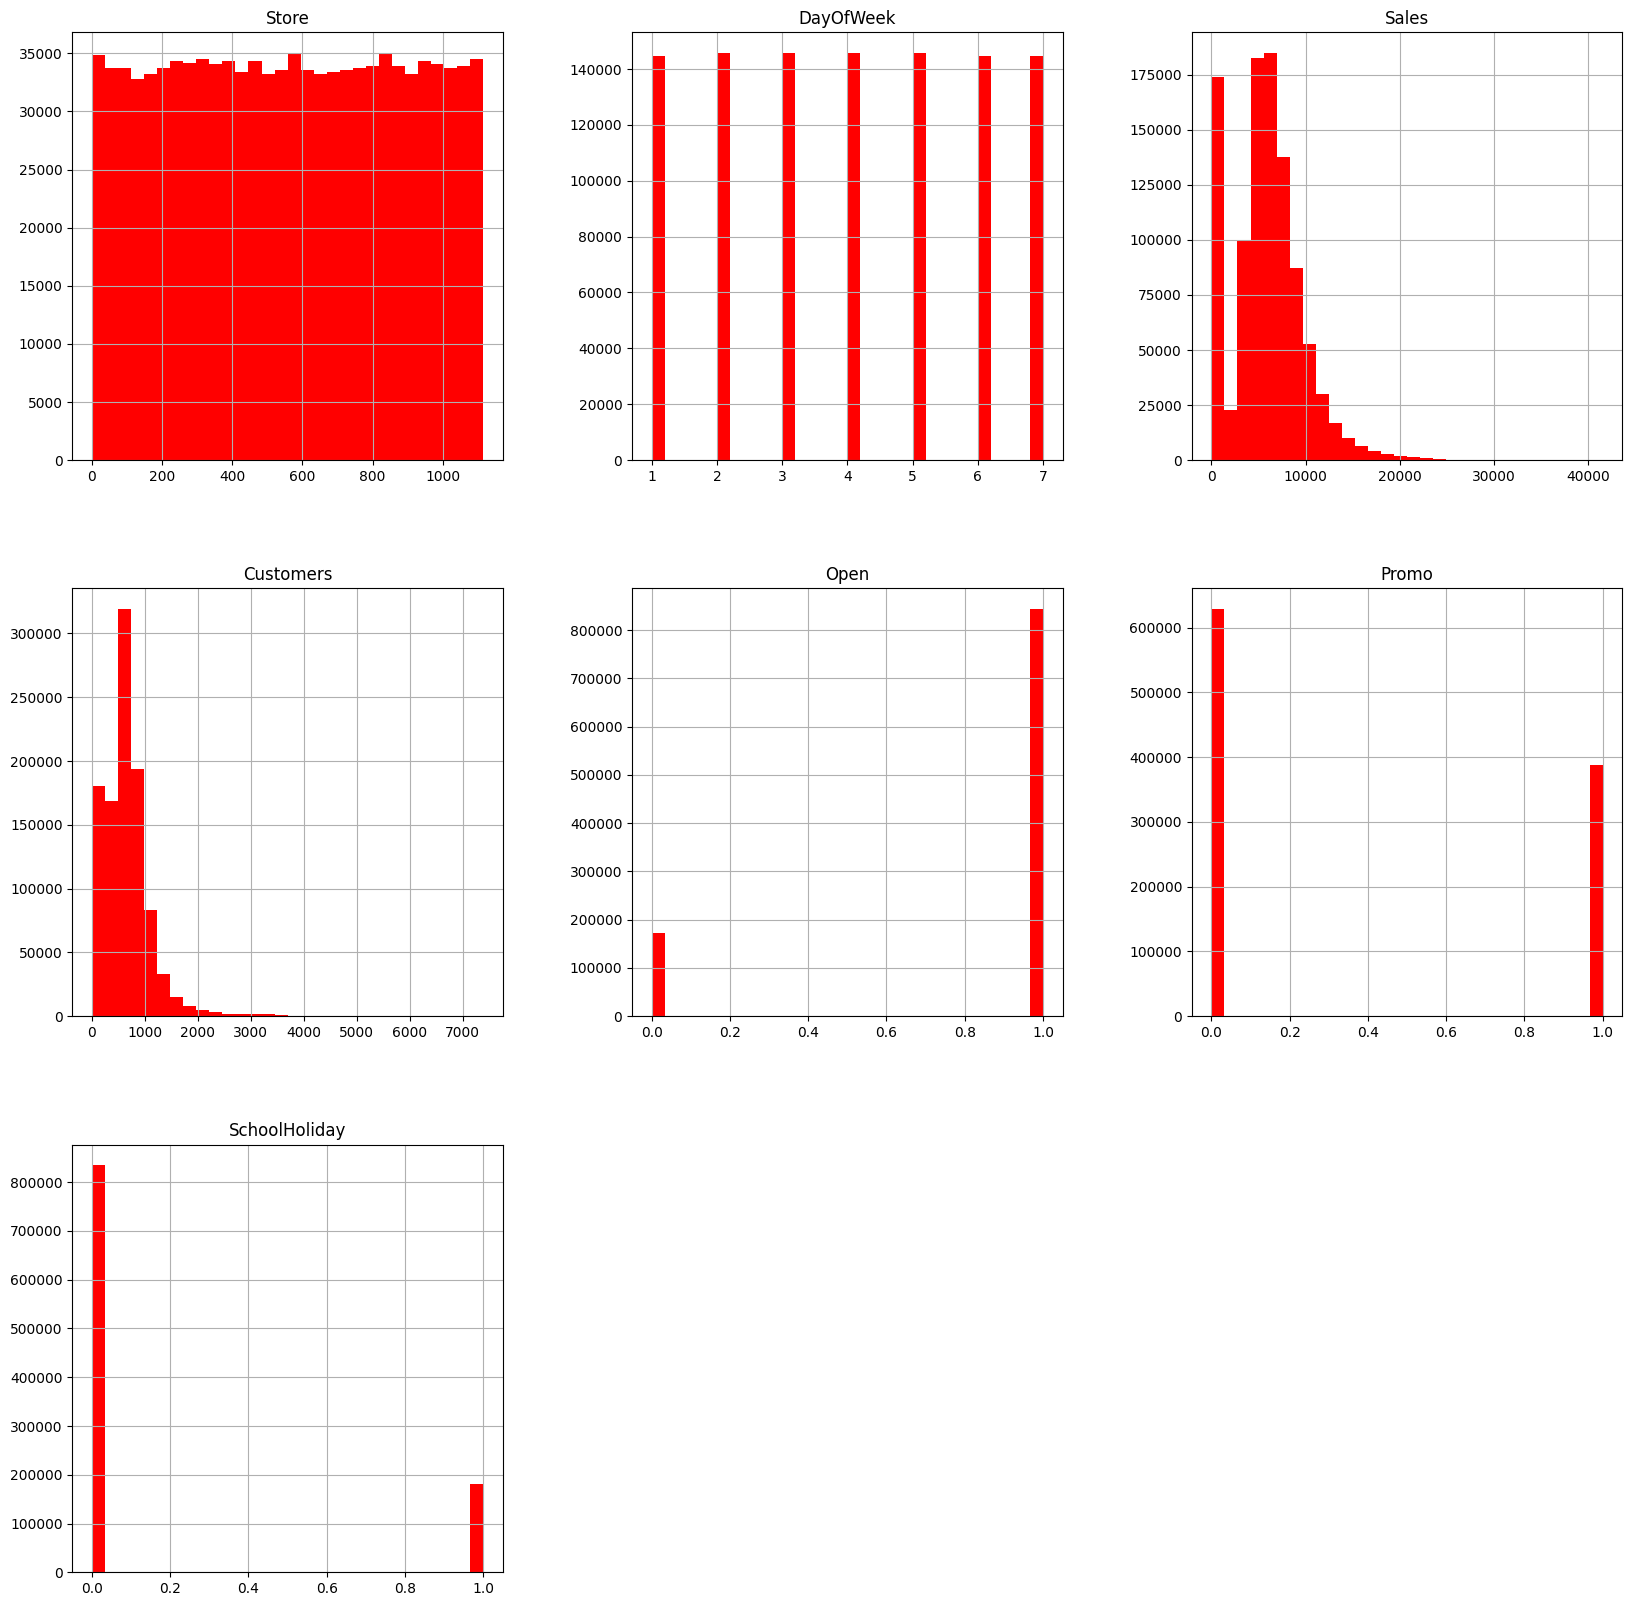

In [22]:
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r')

In [23]:
sales_train_df['Customers'].max()

7388

In [24]:
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [25]:
print('Total = ', len(sales_train_df))
print('Número de lojas/dias fechado = ', len(closed_train_df))
print('Número de lojas/dias aberto = ', len(open_train_df))

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392


dias fechados

In [26]:
172817 / len(store_info_df)

154.99282511210762

dias abertos

In [27]:
844392 / len(store_info_df)

757.3022421524664

In [28]:
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [29]:
sales_train_df.shape

(844392, 9)

In [30]:
sales_train_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1


In [31]:
sales_train_df.drop(['Open'], axis = 1, inplace=True)

In [32]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [33]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


### Dados das lojas

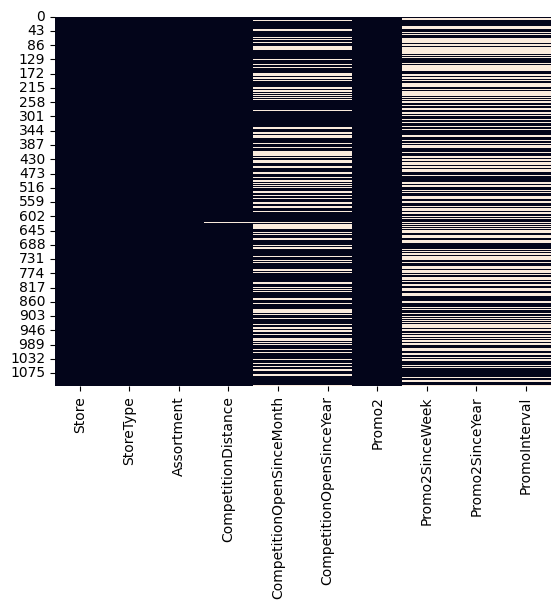

In [34]:
sns.heatmap(store_info_df.isnull(), cbar=False);

In [35]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [36]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [37]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [38]:
store_info_df[store_info_df['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [39]:
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
            'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

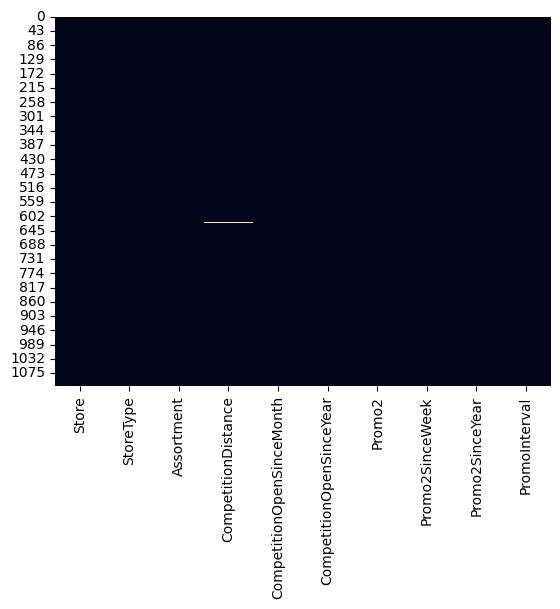

In [40]:
sns.heatmap(store_info_df.isnull(), cbar = False);

In [41]:
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace = True)

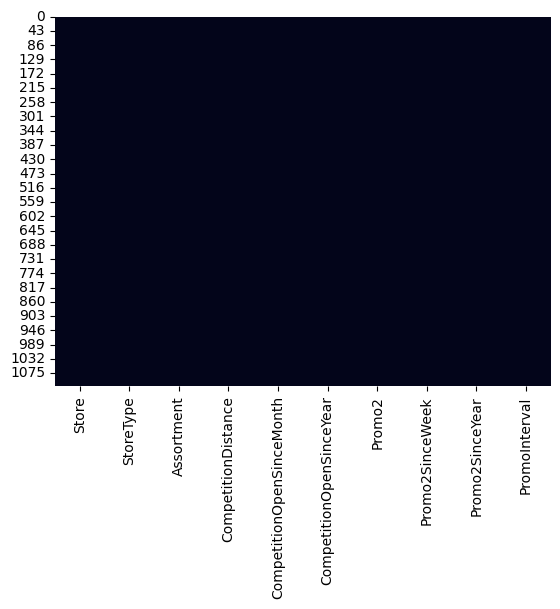

In [42]:
sns.heatmap(store_info_df.isnull(), cbar = False);

array([[<AxesSubplot: title={'center': 'Store'}>,
        <AxesSubplot: title={'center': 'CompetitionDistance'}>,
        <AxesSubplot: title={'center': 'CompetitionOpenSinceMonth'}>],
       [<AxesSubplot: title={'center': 'CompetitionOpenSinceYear'}>,
        <AxesSubplot: title={'center': 'Promo2'}>,
        <AxesSubplot: title={'center': 'Promo2SinceWeek'}>],
       [<AxesSubplot: title={'center': 'Promo2SinceYear'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

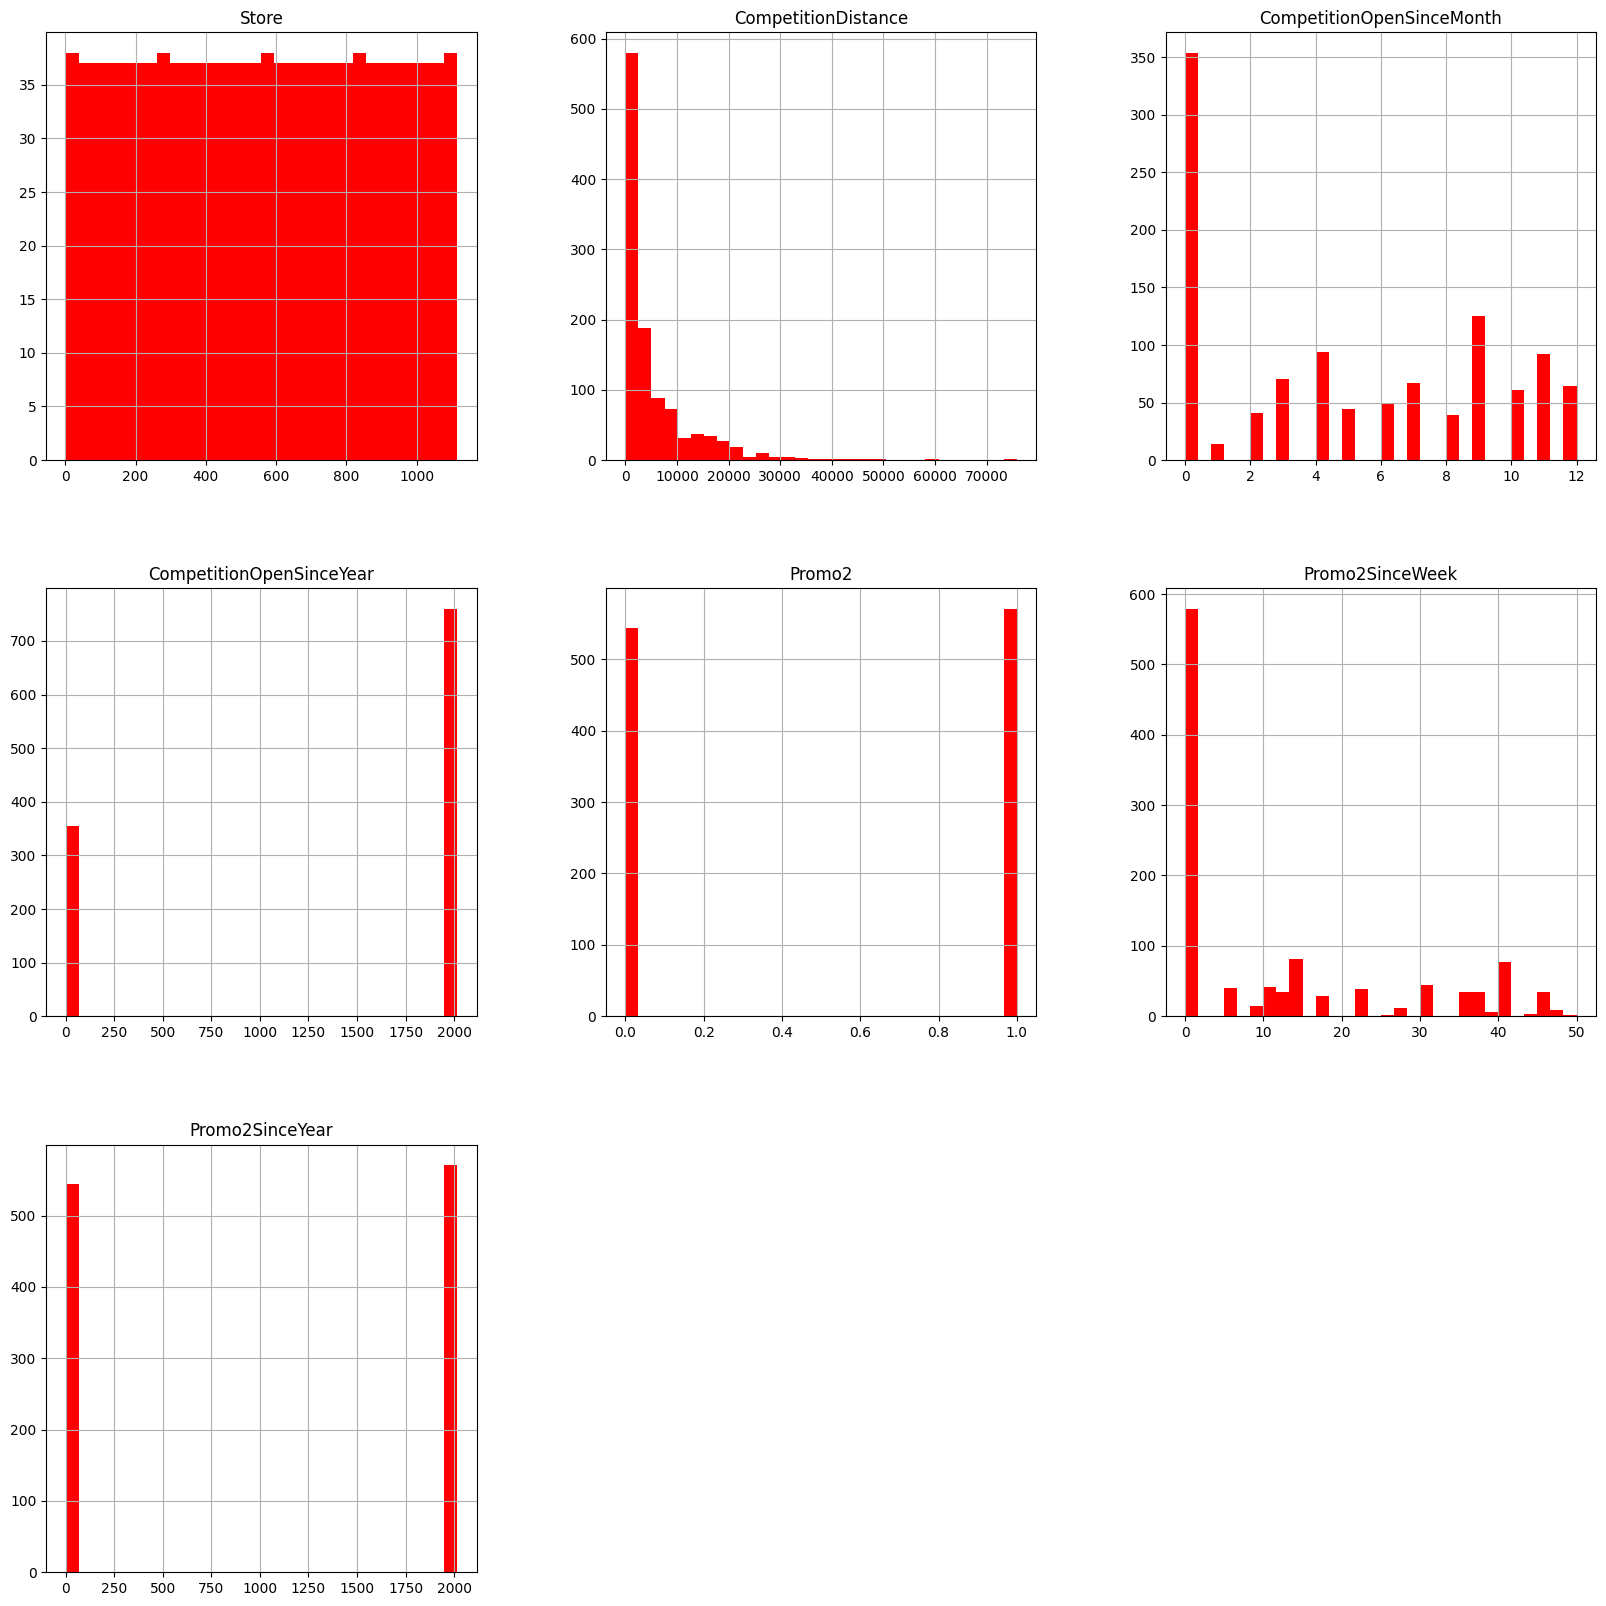

In [43]:
store_info_df.hist(bins = 30, figsize=(20,20), color = 'r')

### Dados unidos (vendas + lojas)

In [44]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [45]:
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [46]:
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how = 'inner', on = 'Store')

In [47]:
sales_train_all_df.shape

(844392, 17)

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\4049795737.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = sales_train_all_df.corr()


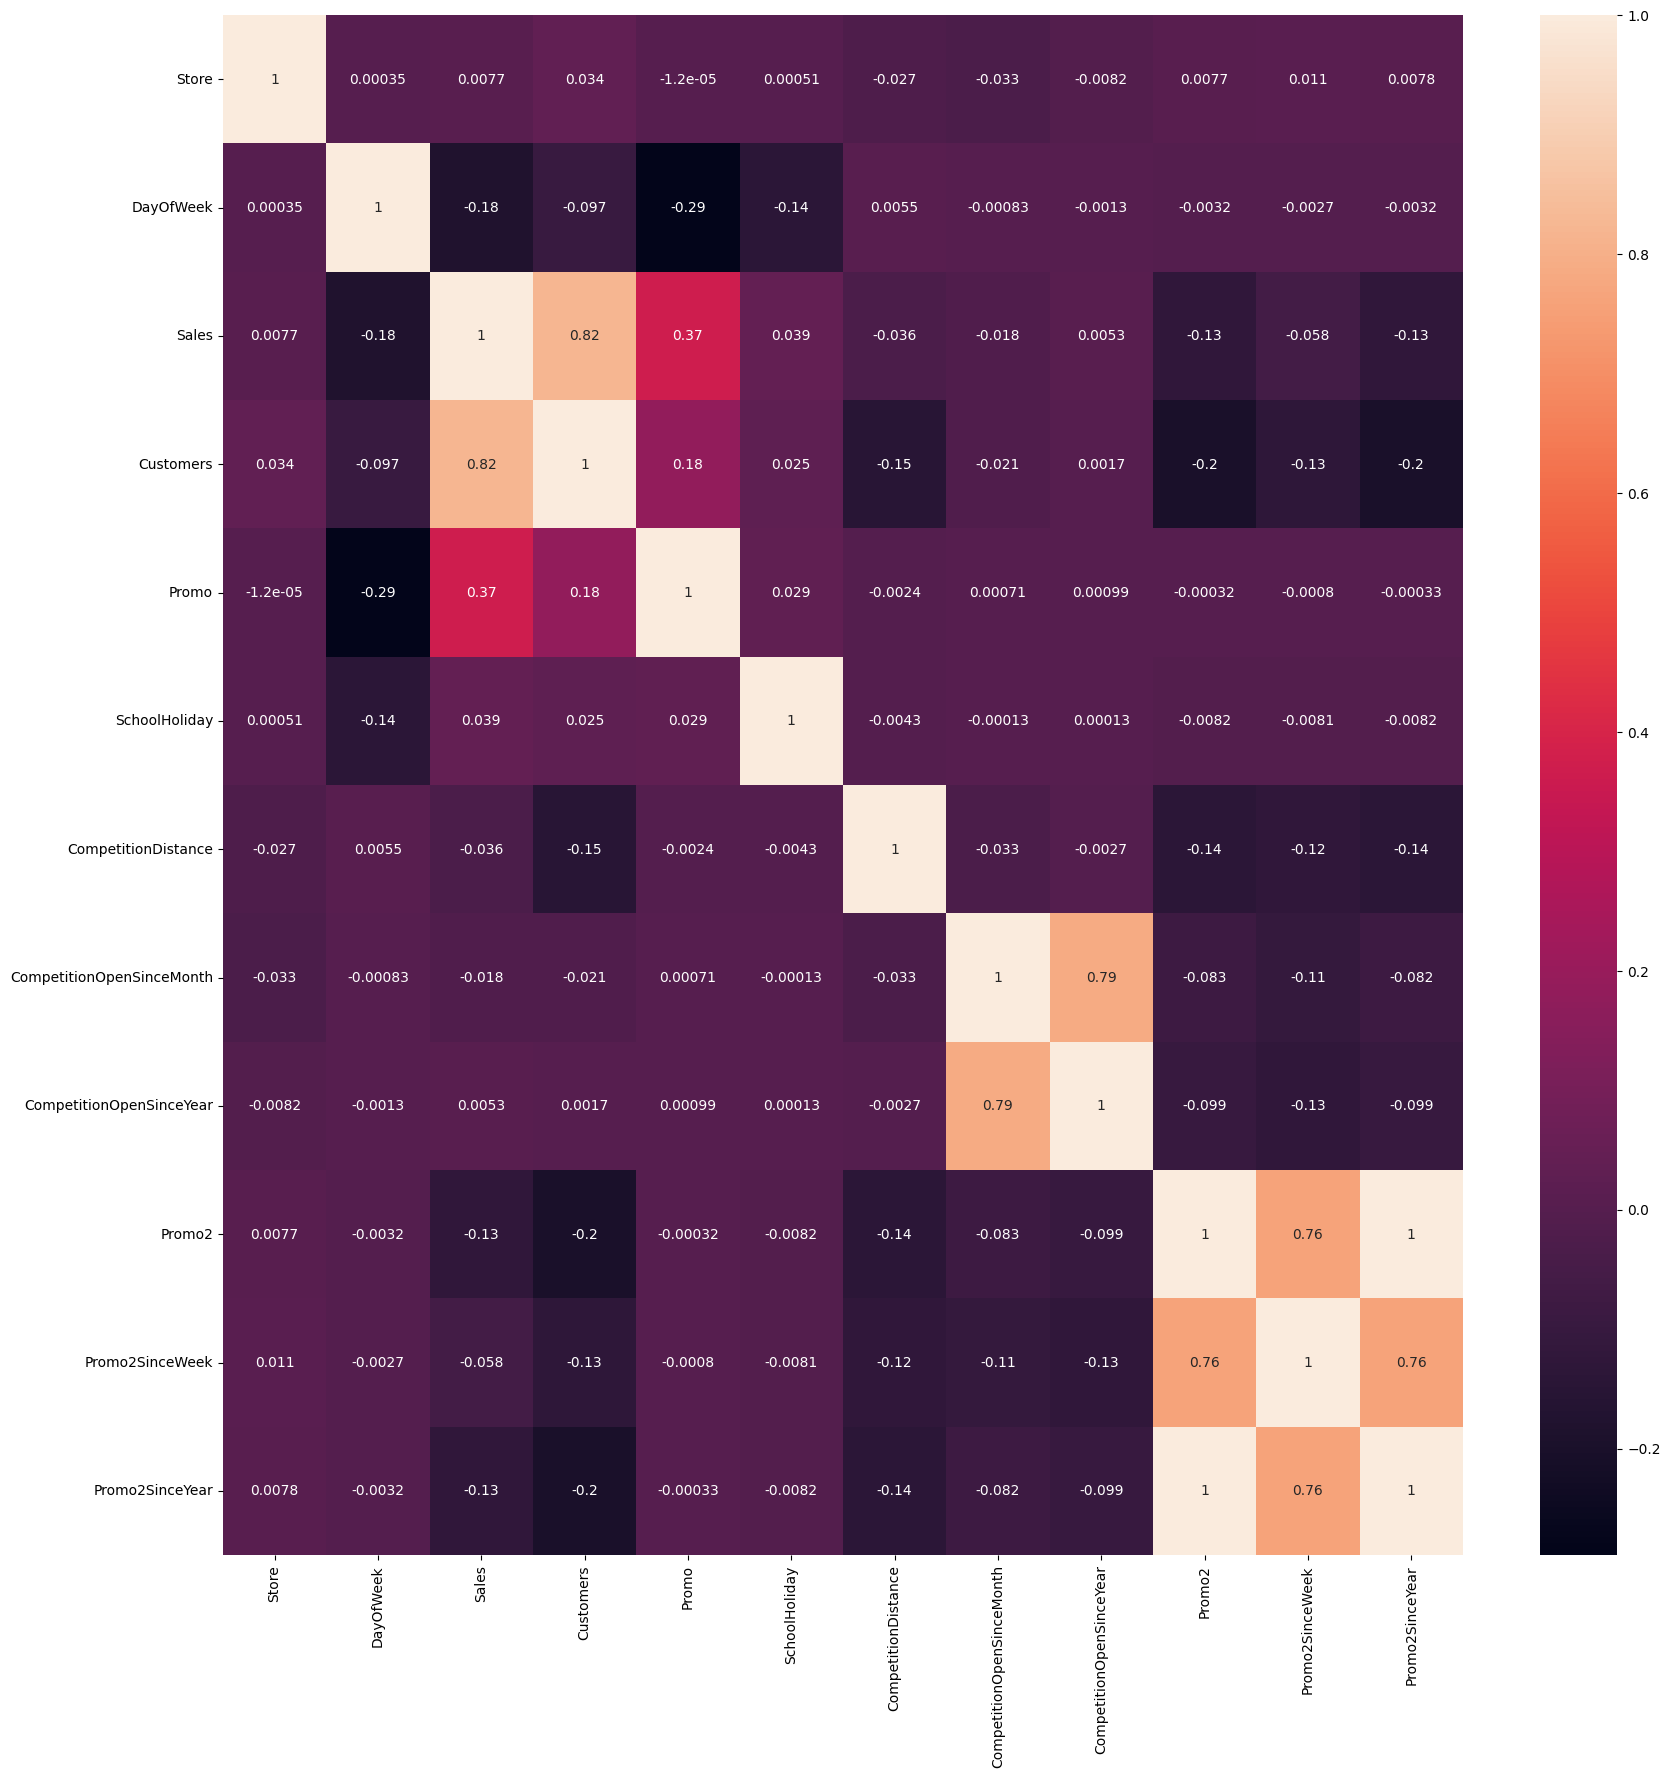

In [48]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot = True);

* Quanto mais clientes maaior o número de vendas
* Os clientes tendem a gastar um pouco a mais nos finais de semanas
* As lojas com promo2 não estão conseguindo atrair um número maior de clientes
* A distância para as empresas concorrentes não parece afetar o número de vendas e de clientes

In [49]:
correlations_sales = sales_train_all_df.corr()['Sales'].sort_values()
correlations_sales

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\2826071610.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_sales = sales_train_all_df.corr()['Sales'].sort_values()


DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [50]:
correlations_customer = sales_train_all_df.corr()['Customers'].sort_values()
correlations_customer

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\2905473433.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations_customer = sales_train_all_df.corr()['Customers'].sort_values()


Promo2                      -0.202232
Promo2SinceYear             -0.202204
CompetitionDistance         -0.148362
Promo2SinceWeek             -0.130841
DayOfWeek                   -0.097266
CompetitionOpenSinceMonth   -0.021006
CompetitionOpenSinceYear     0.001666
SchoolHoliday                0.024902
Store                        0.033977
Promo                        0.182846
Sales                        0.823597
Customers                    1.000000
Name: Customers, dtype: float64

In [51]:
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

In [52]:
sales_train_all_df['Date'] = pd.to_datetime(sales_train_all_df['Date'])

In [53]:
sales_train_promo2 = sales_train_all_df[sales_train_all_df['Promo2']== 1]
sales_train_no_promo2 = sales_train_all_df[sales_train_all_df['Promo2']== 0]

In [54]:
promo_2013=sales_train_promo2[sales_train_promo2['Promo2SinceYear'] >=2013]
promo_2013['Date'] = pd.to_datetime(promo_2013['Date'])
promo_2013['AnoMes'] = promo_2013['Date'].dt.strftime('%Y-%m')

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\3160833159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_2013['Date'] = pd.to_datetime(promo_2013['Date'])
C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\3160833159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_2013['AnoMes'] = promo_2013['Date'].dt.strftime('%Y-%m')


In [55]:
# Função para mapear semana para mês
def map_week_to_month(week):
    month_mapping = {1: 1, 2: 1, 3: 1, 4: 1, 5: 2, 6: 2, 7: 2, 8: 2, 9: 3, 10: 3, 11: 3, 12: 3,
                     13: 3, 14: 4, 15: 4, 16: 4, 17: 4, 18: 5, 19: 5, 20: 5, 21: 4, 22: 6, 23: 6, 24: 6,
                     25: 4, 26: 7, 27: 7, 28: 7, 29: 7, 30: 7, 31: 8, 32: 8, 33: 8, 34: 8, 35: 9, 36: 9,
                     37: 9, 38: 9, 39: 10, 40: 10, 41: 10, 42: 10, 43: 10, 44: 11, 45: 11, 46: 11, 47: 11, 48: 12,49: 12,50: 12,51: 12,52: 12}  # Exemplo de mapeamento
    
    return month_mapping.get(week, None)

# Aplicar a função na coluna de semanas para criar uma nova coluna de meses
promo_2013['Promo2SinceMonth'] = promo_2013['Promo2SinceWeek'].apply(lambda x: map_week_to_month(x))

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\96128923.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  promo_2013['Promo2SinceMonth'] = promo_2013['Promo2SinceWeek'].apply(lambda x: map_week_to_month(x))


In [56]:
# Lista com os nomes das colunas desejadas
colunas_desejadas = ['Store', 'Date', 'Sales', 'Customers','Promo','StoreType','StoreType','StoreType','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval','Promo2SinceMonth','Year','Month','Day','AnoMes']

# Selecionar apenas as colunas desejadas
promo_2013 = promo_2013[colunas_desejadas]

In [57]:
promo_2013['Promo2SinceYear'] = promo_2013['Promo2SinceYear'].astype('int32')
promo_2013['Promo2SinceMonth'] = promo_2013['Promo2SinceMonth'].astype('int32')

In [58]:
promo_2013['datapromo2'] = pd.NaT  # Criar uma coluna vazia para armazenar as datas
for index, row in promo_2013.iterrows():
    year = int(row['Promo2SinceYear'])
    month = int(row['Promo2SinceMonth'])
    date = pd.to_datetime(f'{year}-{month}', format='%Y-%m')
    promo_2013.at[index, 'datapromo2'] = date

In [59]:
promo_2013['datapromo2'] = promo_2013.apply(lambda row: pd.Period(year=int(row['Promo2SinceYear']), month=int(row['Promo2SinceMonth']), freq='M'), axis=1)
promo_2013['Date_period'] = promo_2013['Date'].dt.to_period('M')

In [60]:
promo_2013.loc[promo_2013['Date_period'] < promo_2013['datapromo2'], 'Promo2'] = 0

In [62]:
lojas_seleciondas = promo_2013[promo_2013['Promo2'] == 0]['Store'].unique()


In [63]:
df_lojas_seleciondas = promo_2013[promo_2013["Store"].isin(lojas_seleciondas)]

## Análise nos gráficos


### Promo2 

Text(0.5, 1.0, 'Preço Médio de Vendas por Promo2')

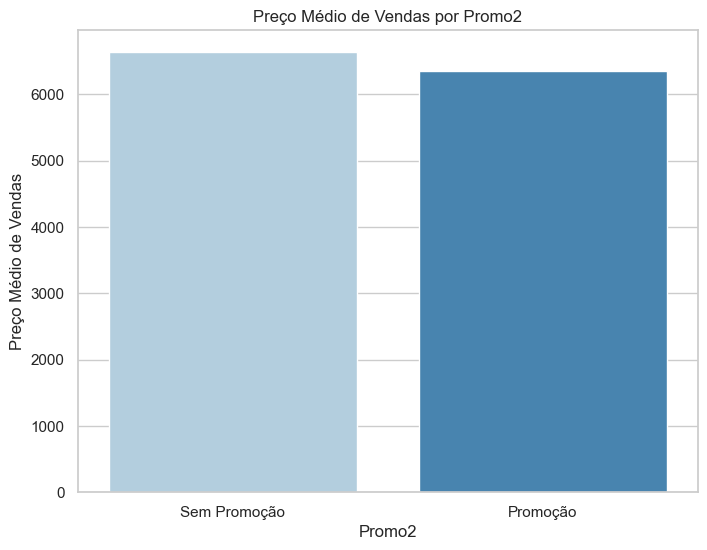

In [89]:
preco_medio_promo2=df_lojas_seleciondas.groupby('Promo2')['Sales'].mean().reset_index()
sns.set(style="whitegrid")

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

plt.figure(figsize=(8, 6))
sns.barplot(data=preco_medio_promo2, x='Promo2', y='Sales', palette='Blues')
plt.xticks(ticks=[0, 1], labels=hue_labels)

plt.xlabel('Promo2')
plt.ylabel('Preço Médio de Vendas')
plt.title('Preço Médio de Vendas por Promo2')

In [65]:
df_lojas_seleciondas_Jan_Apr_Jul_Oct = df_lojas_seleciondas[df_lojas_seleciondas['PromoInterval']=='Jan,Apr,Jul,Oct'] 
df_lojas_seleciondas_Feb_May_Aug_Nov = df_lojas_seleciondas[df_lojas_seleciondas['PromoInterval']=='Feb,May,Aug,Nov']
df_lojas_seleciondas_Mar_Jun_Sept_Dec = df_lojas_seleciondas[df_lojas_seleciondas['PromoInterval']=='Mar,Jun,Sept,Dec']

In [66]:
preco_medio_promo2_Jan_Apr_Jul_Oct = df_lojas_seleciondas_Jan_Apr_Jul_Oct.groupby('Promo2')['Sales'].mean().reset_index()
preco_medio_promo2_Feb_May_Aug_Nov = df_lojas_seleciondas_Feb_May_Aug_Nov.groupby('Promo2')['Sales'].mean().reset_index()
preco_medio_promo2_Mar_Jun_Sept_Dec = df_lojas_seleciondas_Mar_Jun_Sept_Dec.groupby('Promo2')['Sales'].mean().reset_index()

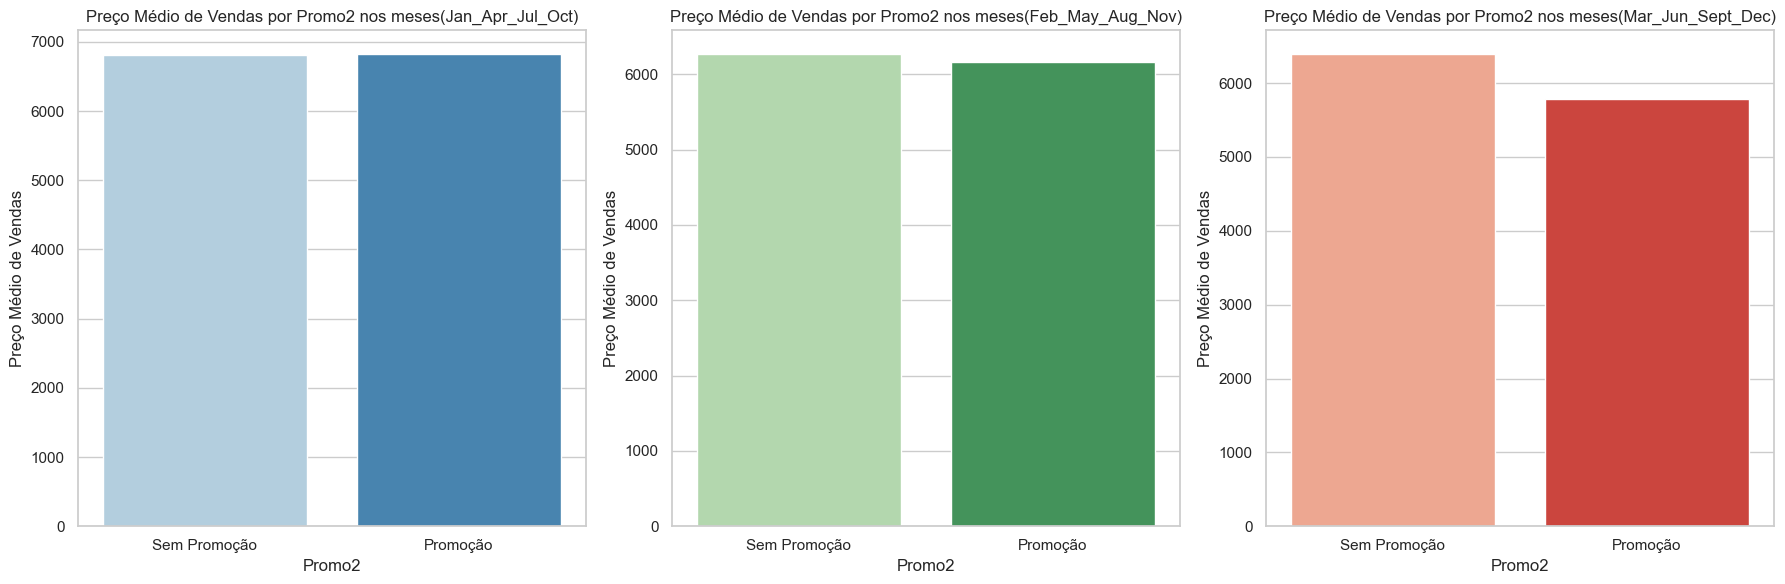

In [90]:

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

# Gráfico 1
sns.barplot(data=preco_medio_promo2_Jan_Apr_Jul_Oct, x='Promo2', y='Sales', palette='Blues', ax=axes[0])
axes[0].set_title('Preço Médio de Vendas por Promo2 nos meses(Jan_Apr_Jul_Oct)')
axes[0].set_xlabel('Promo2')
axes[0].set_ylabel('Preço Médio de Vendas')
axes[0].set_xticklabels(hue_labels)

sns.barplot(data=preco_medio_promo2_Feb_May_Aug_Nov, x='Promo2', y='Sales', palette='Greens', ax=axes[1])
axes[1].set_title('Preço Médio de Vendas por Promo2 nos meses(Feb_May_Aug_Nov)')
axes[1].set_xlabel('Promo2')
axes[1].set_ylabel('Preço Médio de Vendas')
axes[1].set_xticklabels(hue_labels)

sns.barplot(data=preco_medio_promo2_Mar_Jun_Sept_Dec, x='Promo2', y='Sales', palette='Reds', ax=axes[2])
axes[2].set_title('Preço Médio de Vendas por Promo2 nos meses(Mar_Jun_Sept_Dec)')
axes[2].set_xlabel('Promo2')
axes[2].set_ylabel('Preço Médio de Vendas')
axes[2].set_xticklabels(hue_labels)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, ' Média de  Customers na promo2')

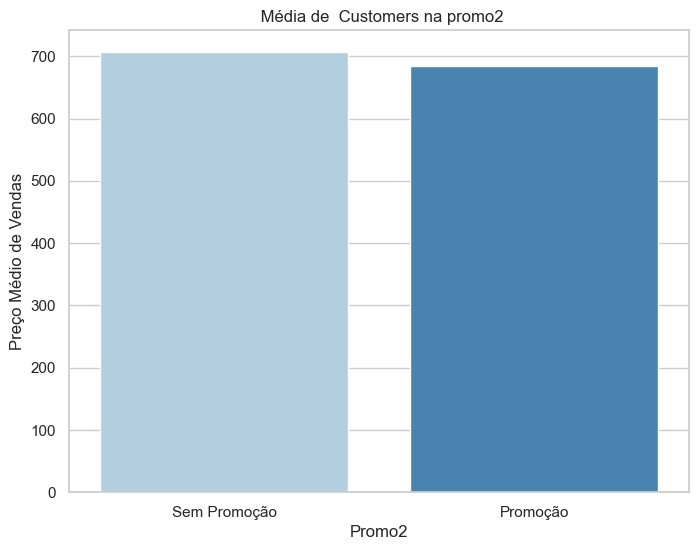

In [88]:
cliente_medio_promo2=df_lojas_seleciondas.groupby('Promo2')['Customers'].mean().reset_index()
sns.set(style="whitegrid")

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

plt.figure(figsize=(8, 6))
sns.barplot(data=cliente_medio_promo2, x='Promo2', y='Customers', palette='Blues')
plt.xticks(ticks=[0, 1], labels=hue_labels)


plt.xlabel('Promo2')
plt.ylabel('Preço Médio de Vendas')
plt.title(' Média de  Customers na promo2')

In [69]:
clientes_medio_promo2_Jan_Apr_Jul_Oct = df_lojas_seleciondas_Jan_Apr_Jul_Oct.groupby('Promo2')['Customers'].mean().reset_index()
clientes_medio_promo2_Feb_May_Aug_Nov = df_lojas_seleciondas_Feb_May_Aug_Nov.groupby('Promo2')['Customers'].mean().reset_index()
clientes_medio_promo2_Mar_Jun_Sept_Dec = df_lojas_seleciondas_Mar_Jun_Sept_Dec.groupby('Promo2')['Customers'].mean().reset_index()

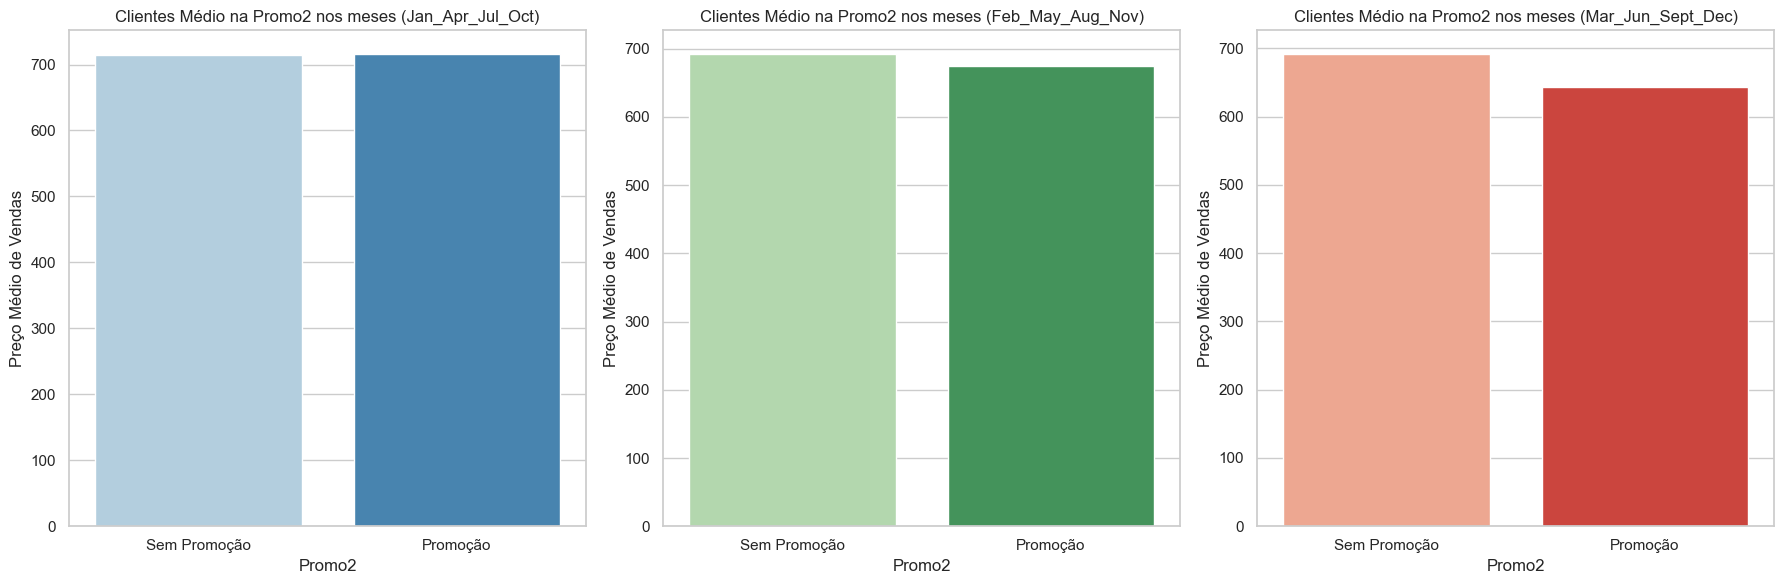

In [85]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

sns.barplot(data=clientes_medio_promo2_Jan_Apr_Jul_Oct, x='Promo2', y='Customers', palette='Blues', ax=axes[0], hue_order=hue_order)
axes[0].set_title('Clientes Médio na Promo2 nos meses (Jan_Apr_Jul_Oct)')
axes[0].set_xlabel('Promo2')
axes[0].set_ylabel('Preço Médio de Vendas')
axes[0].set_xticklabels(hue_labels)


sns.barplot(data=clientes_medio_promo2_Feb_May_Aug_Nov, x='Promo2', y='Customers', palette='Greens', ax=axes[1], hue_order=hue_order)
axes[1].set_title('Clientes Médio na Promo2 nos meses (Feb_May_Aug_Nov)')
axes[1].set_xlabel('Promo2')
axes[1].set_ylabel('Preço Médio de Vendas')
axes[1].set_xticklabels(hue_labels)


sns.barplot(data=clientes_medio_promo2_Mar_Jun_Sept_Dec, x='Promo2', y='Customers', palette='Reds', ax=axes[2], hue_order=hue_order)
axes[2].set_title('Clientes Médio na Promo2 nos meses (Mar_Jun_Sept_Dec)')
axes[2].set_xlabel('Promo2')
axes[2].set_ylabel('Preço Médio de Vendas')
axes[2].set_xticklabels(hue_labels)

plt.tight_layout()
plt.show()

### Promo

Text(0, 0.5, 'Preço Médio de Vendas')

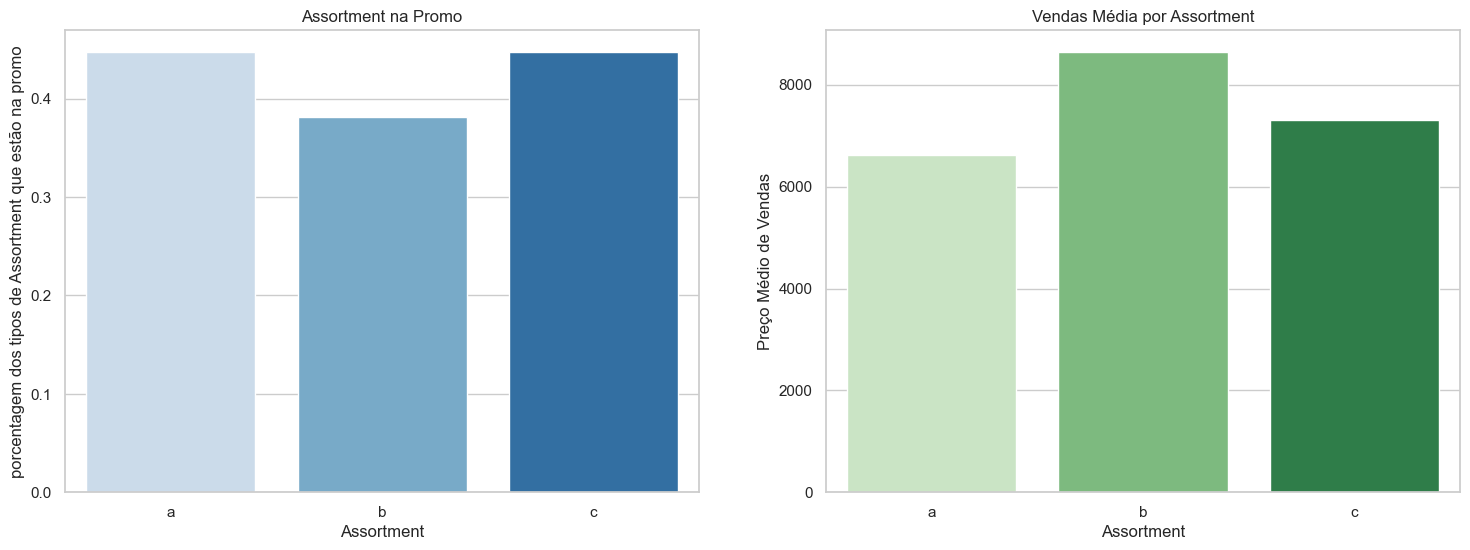

In [149]:
Assortment_promo = sales_train_all_df.groupby('Assortment')[['Promo']].mean().reset_index()
Assortment_sales = sales_train_all_df.groupby('Assortment')[['Sales']].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(data=Assortment_promo, x='Assortment', y='Promo', palette='Blues', ax=axes[0],)
axes[0].set_title('Assortment na Promo')
axes[0].set_xlabel('Assortment')
axes[0].set_ylabel('porcentagem dos tipos de Assortment que estão na promo')

sns.barplot(data=Assortment_sales, x='Assortment', y='Sales', palette='Greens', ax=axes[1])
axes[1].set_title('Vendas Média por Assortment')
axes[1].set_xlabel('Assortment')
axes[1].set_ylabel('Preço Médio de Vendas')

o Assortment do tipo apersar de ser o que menos participou da promoção quando participou teve um aumento nas vendas e nos clientes

[Text(0, 0, 'Sem Promoção'), Text(1, 0, 'Promoção')]

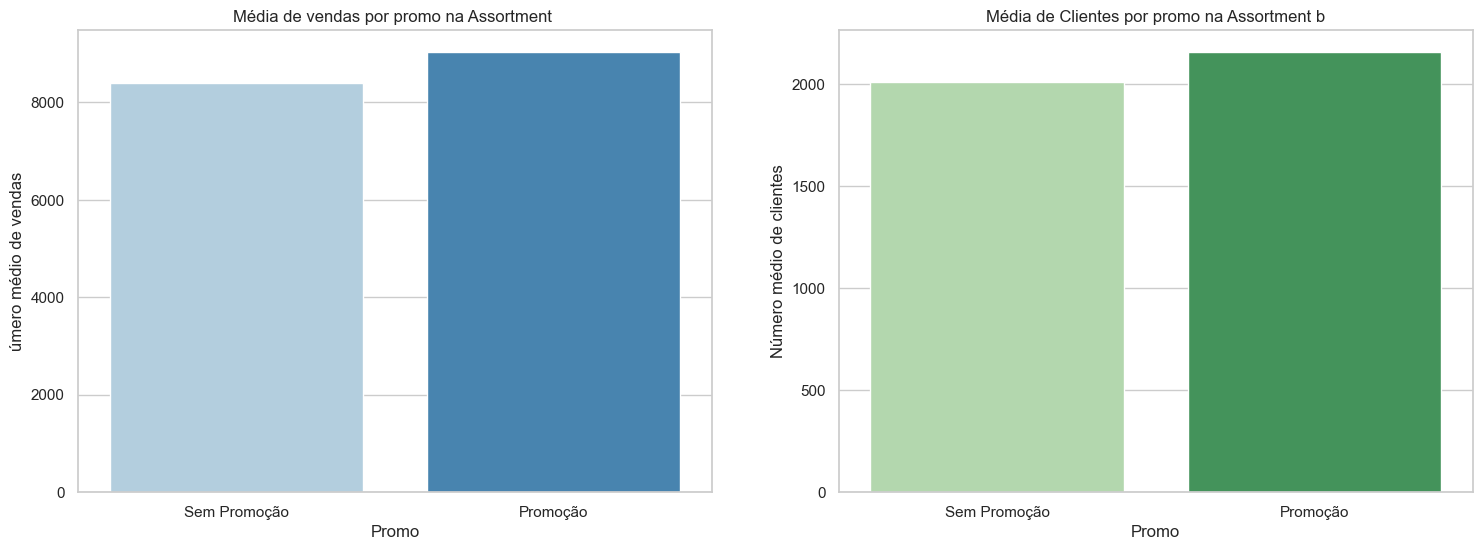

In [158]:
Assortment_b_sales = sales_train_all_df[sales_train_all_df['Assortment']=='b']
Assortment_b_customers =sales_train_all_df[sales_train_all_df['Assortment']=='b']
Assortment_b_sales = Assortment_b_sales.groupby('Promo')[['Sales']].mean().reset_index()
Assortment_b_customers = Assortment_b_customers.groupby('Promo')[['Customers']].mean().reset_index()

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(data=Assortment_b_sales, x='Promo', y='Sales', palette='Blues', ax=axes[0],)
axes[0].set_title('Média de vendas por promo na Assortment ')
axes[0].set_xlabel('Promo')
axes[0].set_ylabel('úmero médio de vendas')
axes[0].set_xticklabels(hue_labels)

sns.barplot(data=Assortment_b_customers, x='Promo', y='Customers', palette='Greens', ax=axes[1])
axes[1].set_title('Média de Clientes por promo na Assortment b')
axes[1].set_xlabel('Promo')
axes[1].set_ylabel('Número médio de clientes')
axes[1].set_xticklabels(hue_labels)

Text(0, 0.5, 'Preço Médio de Vendas')

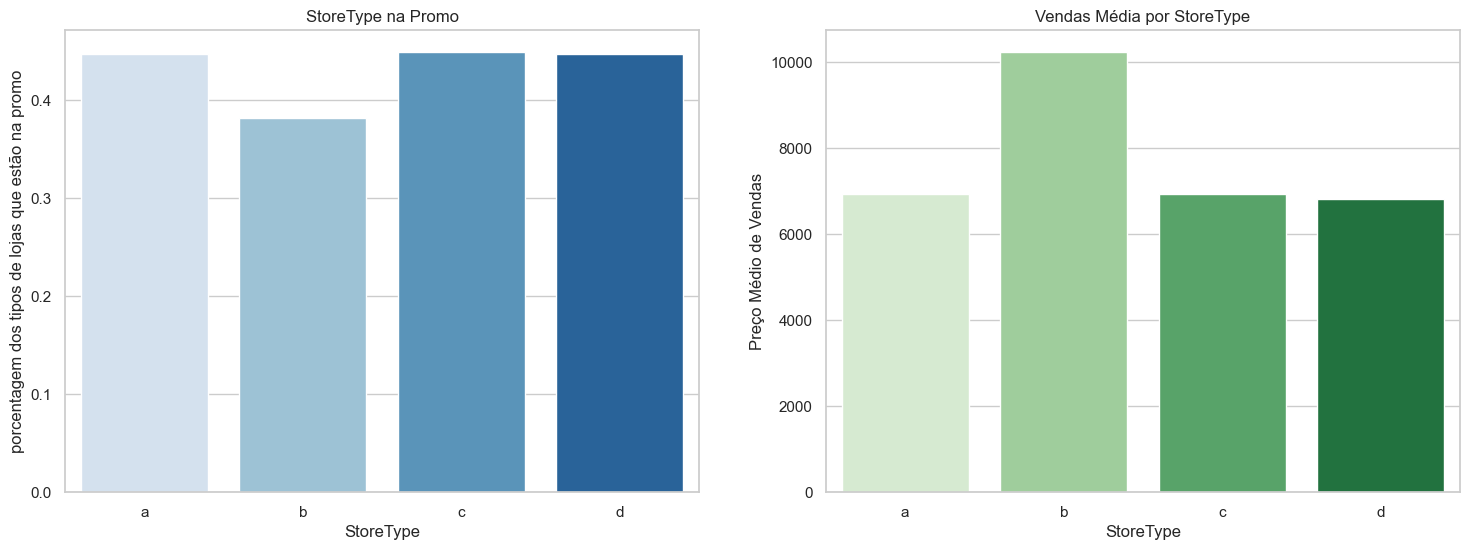

In [106]:
StoreType_promo = sales_train_all_df.groupby('StoreType')[['Promo']].mean().reset_index()
StroeType_sales = sales_train_all_df.groupby('StoreType')[['Sales']].mean().reset_index()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(data=StoreType_promo, x='StoreType', y='Promo', palette='Blues', ax=axes[0],)
axes[0].set_title('StoreType na Promo')
axes[0].set_xlabel('StoreType')
axes[0].set_ylabel('porcentagem dos tipos de lojas que estão na promo')

sns.barplot(data=StroeType_sales, x='StoreType', y='Sales', palette='Greens', ax=axes[1])
axes[1].set_title('Vendas Média por StoreType')
axes[1].set_xlabel('StoreType')
axes[1].set_ylabel('Preço Médio de Vendas')


Por mais que a loja do tipo seja a que mais fature e que menos participa da Promo,as lojas do tipo com mais clietes e vendas são as que estao na promo

[Text(0, 0, 'Sem Promoção'), Text(1, 0, 'Promoção')]

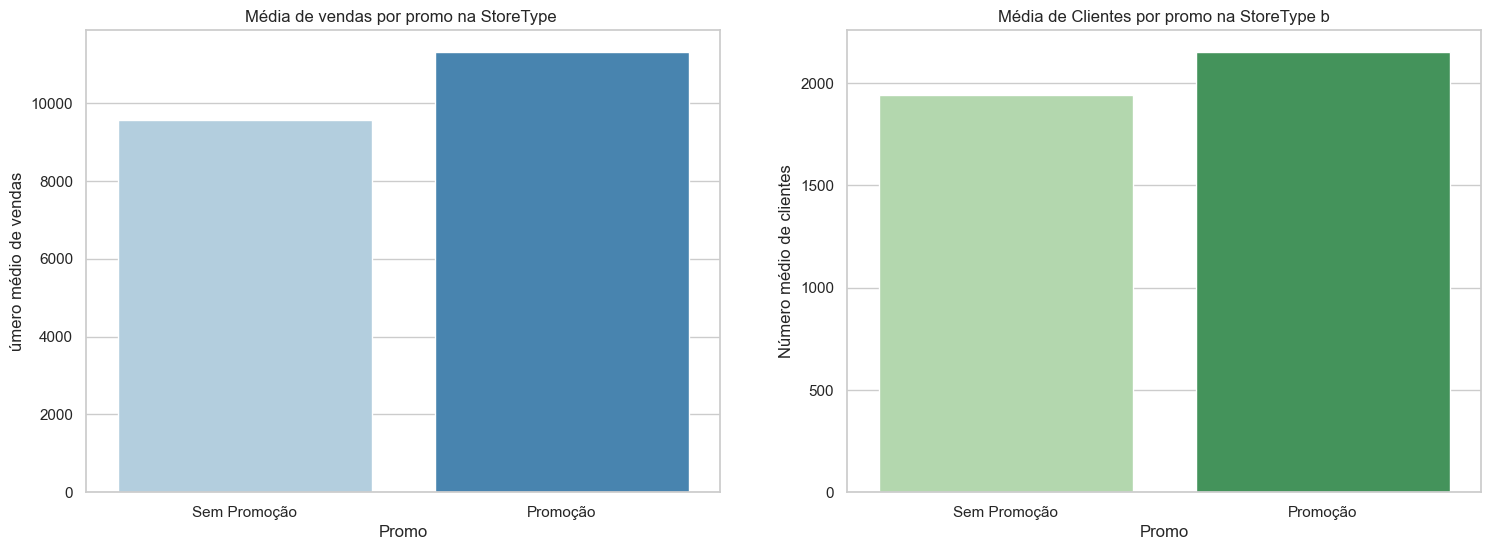

In [134]:
StoreType_b_sales =sales_train_all_df[sales_train_all_df['StoreType']=='b']
StoreType_b_customers =sales_train_all_df[sales_train_all_df['StoreType']=='b']
StoreType_b_sales = StoreType_b_sales.groupby('Promo')[['Sales']].mean().reset_index()
StoreType_b_customers = StoreType_b_customers.groupby('Promo')[['Customers']].mean().reset_index()

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

sns.barplot(data=StoreType_b_sales, x='Promo', y='Sales', palette='Blues', ax=axes[0],)
axes[0].set_title('Média de vendas por promo na StoreType ')
axes[0].set_xlabel('Promo')
axes[0].set_ylabel('úmero médio de vendas')
axes[0].set_xticklabels(hue_labels)

sns.barplot(data=StoreType_b_customers, x='Promo', y='Customers', palette='Greens', ax=axes[1])
axes[1].set_title('Média de Clientes por promo na StoreType b')
axes[1].set_xlabel('Promo')
axes[1].set_ylabel('Número médio de clientes')
axes[1].set_xticklabels(hue_labels)

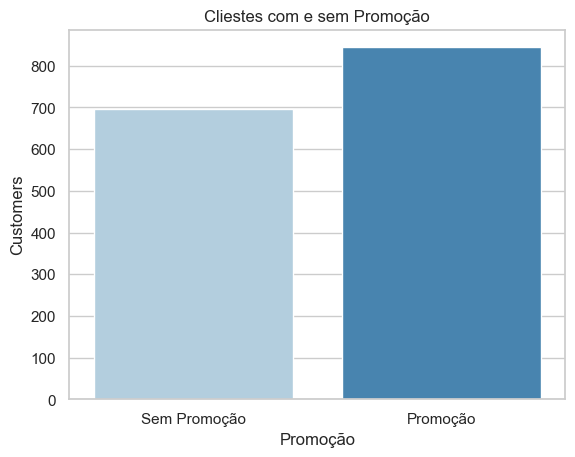

In [135]:
customer_promo = sales_train_all_df.groupby('Promo')[['Customers']].mean().reset_index()

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

sns.barplot(data=customer_promo, x='Promo', y='Customers', palette='Blues', hue_order=hue_order)


plt.xticks(ticks=[0, 1], labels=hue_labels)

plt.xlabel('Promoção')
plt.ylabel('Customers')
plt.title('Cliestes com e sem Promoção')

plt.show()

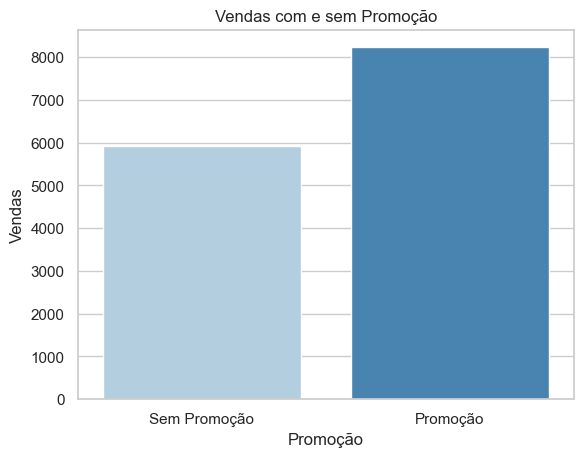

In [84]:
sales_promo = sales_train_all_df.groupby('Promo')[['Sales']].mean().reset_index()

hue_order = [0, 1]
hue_labels = ["Sem Promoção", "Promoção"]

sns.barplot(data=sales_promo, x='Promo', y='Sales', palette='Blues', hue_order=hue_order)


plt.xticks(ticks=[0, 1], labels=hue_labels)

plt.xlabel('Promoção')
plt.ylabel('Vendas')
plt.title('Vendas com e sem Promoção')

plt.show()

### Vendas

Text(0.5, 1.0, 'Vendas com e sem Promoção')

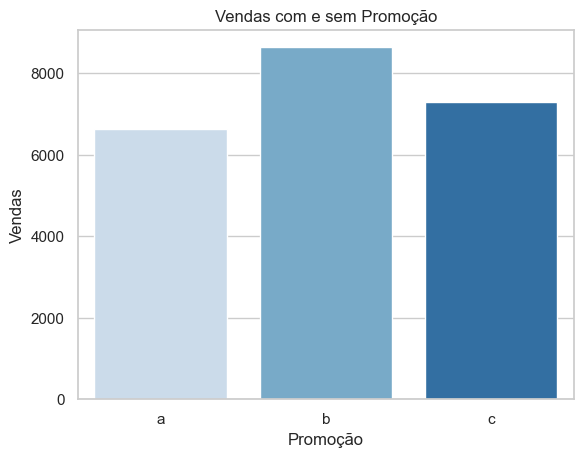

In [139]:
SalesAssortment = sales_train_all_df.groupby('Assortment')[['Sales']].mean().reset_index()

sns.barplot(data=SalesAssortment, x='Assortment', y='Sales', palette='Blues')

plt.xlabel('Assortment')
plt.ylabel('Vendas')
plt.title('Vendas por assorment')


Text(0.5, 1.0, 'Média de vendas por mês')

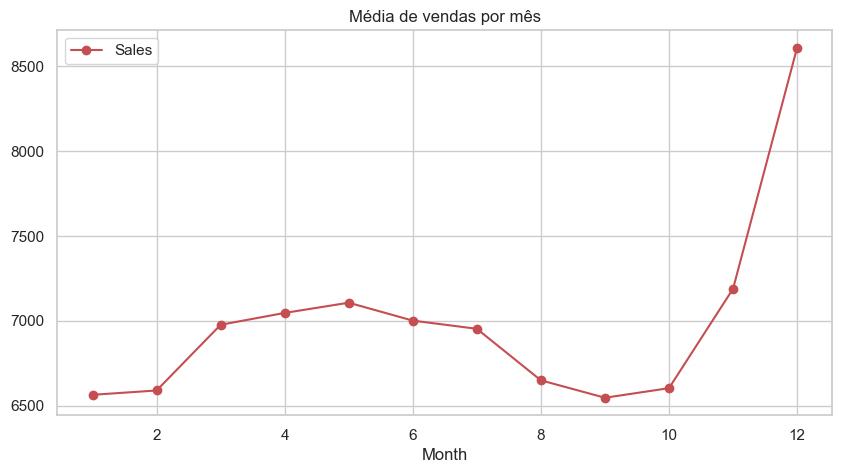

In [72]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por mês')

Text(0.5, 1.0, 'Média de vendas por dia')

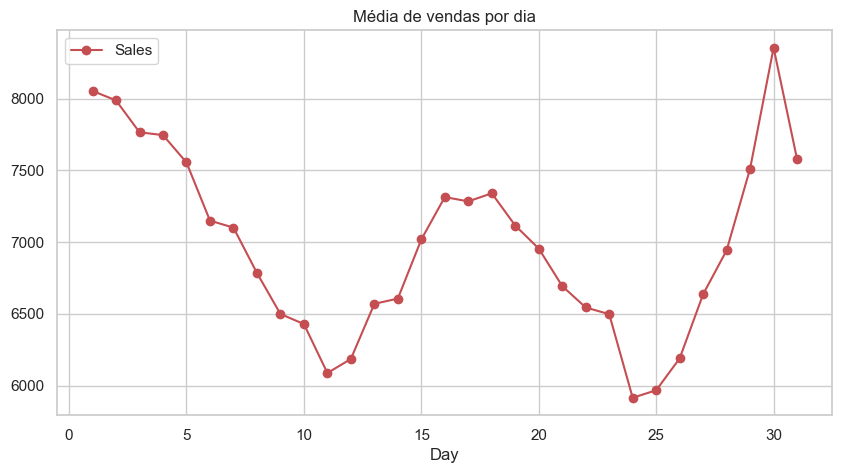

In [73]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia')

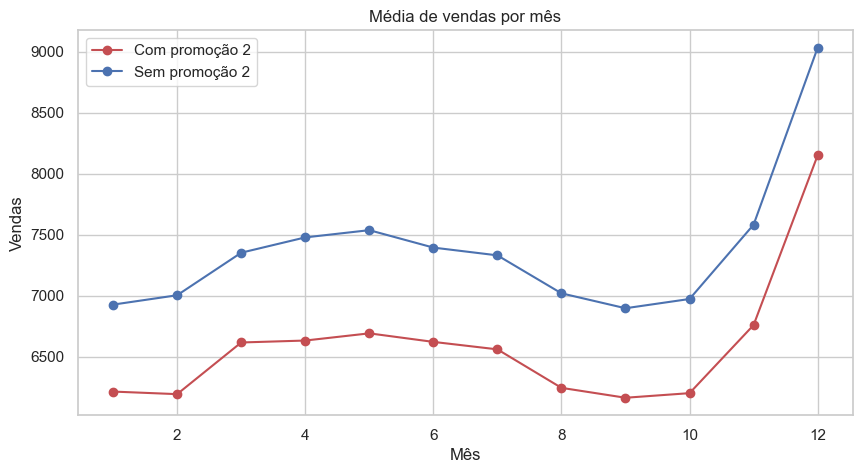

In [140]:
# Calcular a média de vendas por mês em cada dataframe
sales_mean_df1 = sales_train_promo2.groupby('Month')['Sales'].mean()
sales_mean_df2 = sales_train_no_promo2.groupby('Month')['Sales'].mean()

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(10, 5))
sales_mean_df1.plot(marker='o', color='r', label='Com promoção 2', ax=ax)
sales_mean_df2.plot(marker='o', color='b', label='Sem promoção 2', ax=ax)

# Adicionar título e rótulos
ax.set_title('Média de vendas por mês')
ax.set_xlabel('Mês')
ax.set_ylabel('Vendas')

# Exibir a legenda
ax.legend()

# Exibir o gráfico
plt.show()

Text(0.5, 1.0, 'Média de clientes por mês')

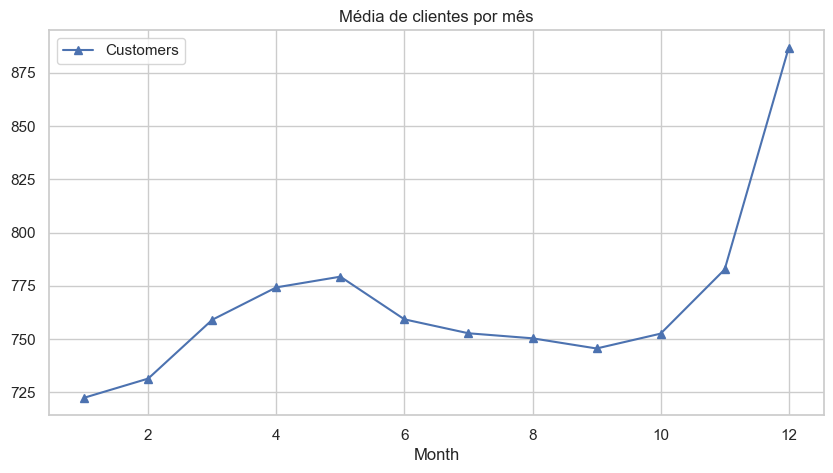

In [141]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por mês')

Text(0.5, 1.0, 'Média de clientes por dia')

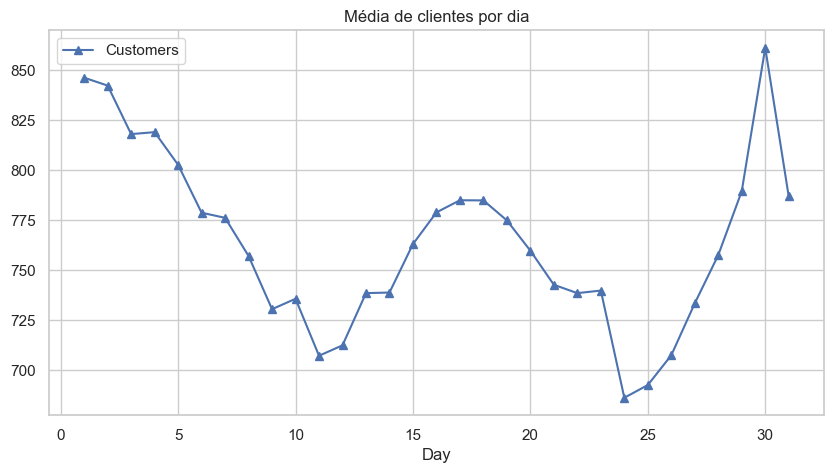

In [142]:
axis = sales_train_all_df.groupby('Day')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia')

Text(0.5, 1.0, 'Média de vendas por dia da semana')

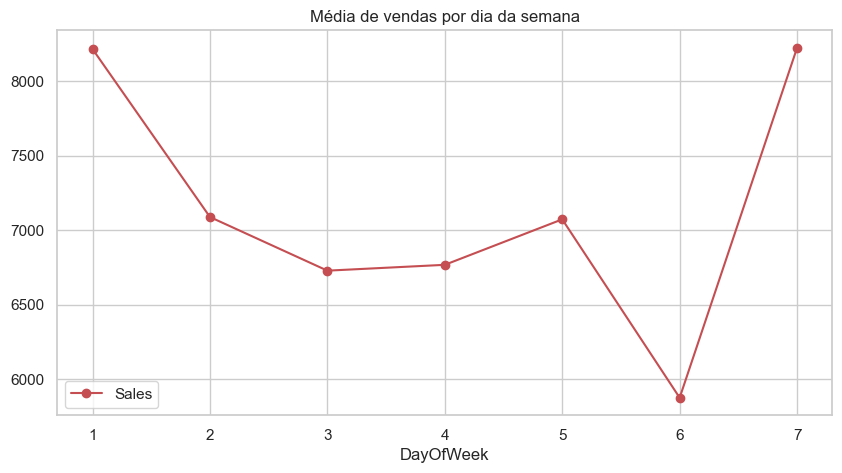

In [143]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize = (10,5), marker = 'o', color = 'r')
axis.set_title('Média de vendas por dia da semana')

Text(0.5, 1.0, 'Média de clientes por dia da semana')

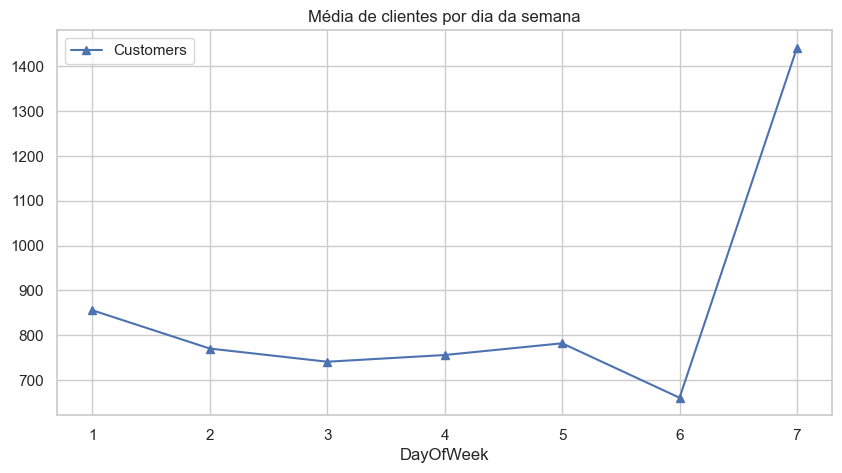

In [144]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize = (10,5), marker = '^', color = 'b')
axis.set_title('Média de clientes por dia da semana')

C:\Users\cvcam\AppData\Local\Temp\ipykernel_22076\4036557160.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)


<AxesSubplot: xlabel='Date'>

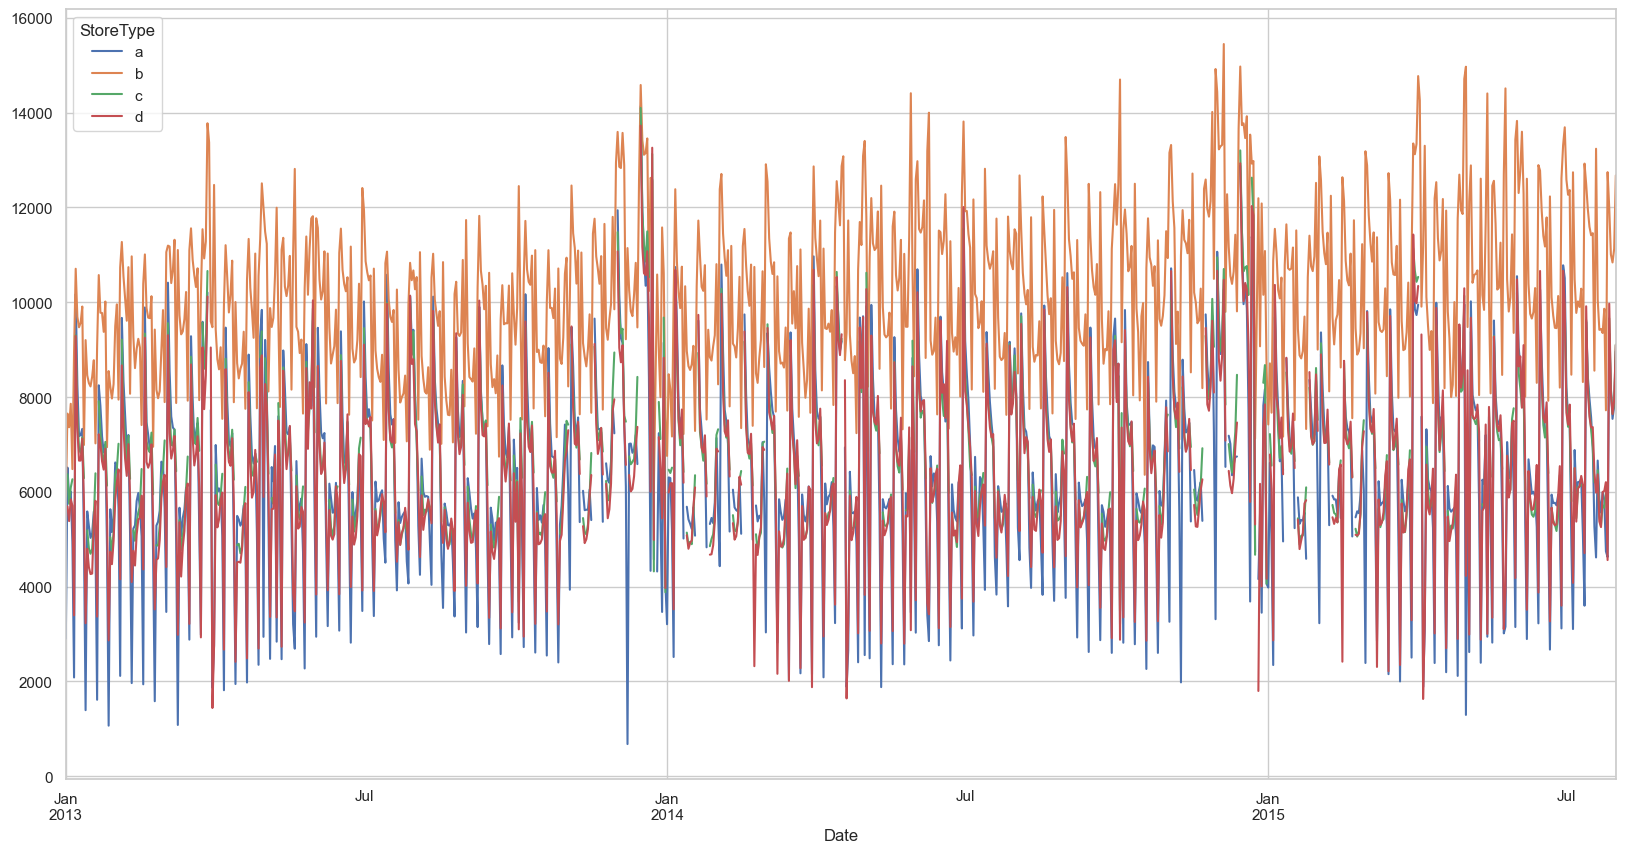

In [145]:
fig, ax = plt.subplots(figsize = (20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

## Treinamento do modelo - parte 1

In [2]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
# Date: ds
# Sales: y
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [ ]:
#df = sales_prediction(10, sales_train_all_df, 60)
#df

,ds,y
7819,2013-01-02,4812
7818,2013-01-03,4675
7817,2013-01-04,5114
7816,2013-01-05,4256
7815,2013-01-07,7804
...,...,...
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


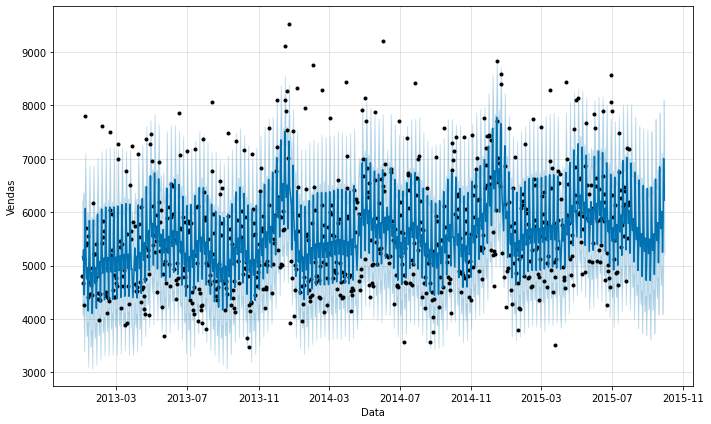

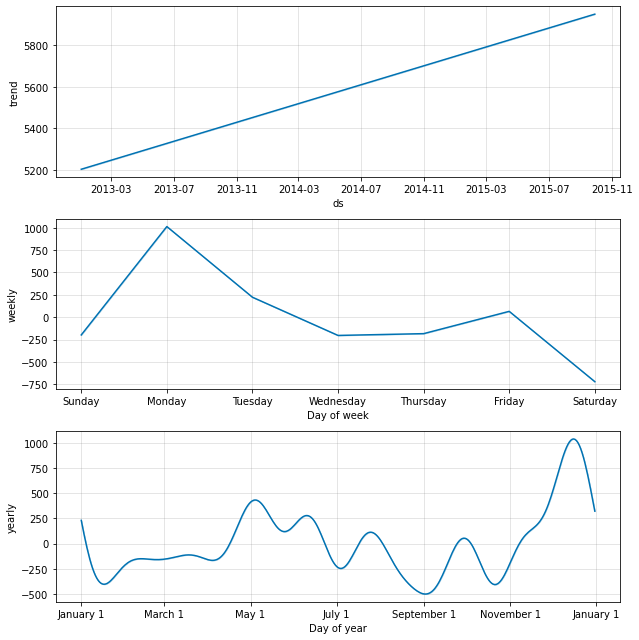

In [ ]:
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)

In [ ]:
df_origin.shape, df_prediction.shape

((784, 2), (794, 19))

In [ ]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4145.444479,6204.346345,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4023.876346,6217.552477,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4231.868552,6342.434294,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3348.845519,5558.711397,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,5006.855999,7075.864323,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716


In [ ]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4186.743597,6221.027934,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4676.423978,6808.607832,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,5863.026222,8019.821471,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,5077.101115,7166.020284,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4602.182979,6671.474809,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4602.816156,6704.120546,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4841.722666,6948.021005,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,3995.029547,6089.579760,5909.964567,5909.964567,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4441.240615,6613.984487,5910.708886,5910.708890,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5693.804665,7785.395592,5911.453200,5911.453219,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


In [ ]:
df_prediction.tail(60).to_csv('previsoes_vendas.csv')

In [ ]:
df_origin.tail()

,ds,y
7040,2015-07-27,7212
7039,2015-07-28,6140
7038,2015-07-29,5524
7037,2015-07-30,6186
7036,2015-07-31,7185


## Treinamento do modelo - parte 2


   - StateHoliday: Normalmente todas as lojas estão fechadas nesses feriados. As escolas estão fechadas nesses feriados e nos finais de semana. Legenda: a = public holiday, b = Páscoa, c = Natal, 0 = Nenhum feriado
   - SchoolHoliday: indica se a loja foi afetada pelo feriado escolar
  






In [ ]:
def sales_prediction(store_id, sales_df, holidays, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns = {'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet(holidays=holidays)
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

In [ ]:
sales_train_all_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,31
1,1,4,2015-07-30,5020,546,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,30
2,1,3,2015-07-29,4782,523,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,29
3,1,2,2015-07-28,5011,560,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,28
4,1,1,2015-07-27,6102,612,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,2015,7,27


In [ ]:
school_holidays = sales_train_all_df[sales_train_all_df['SchoolHoliday'] == 1].loc[:, 'Date'].values
school_holidays.shape

(163457,)

In [ ]:
school_holidays

array(['2015-07-31', '2015-07-30', '2015-07-29', ..., '2013-01-04',
       '2013-01-03', '2013-01-02'], dtype=object)

In [ ]:
len(np.unique(school_holidays))

477

In [ ]:
state_holidays = sales_train_all_df[(sales_train_all_df['StateHoliday'] == 'a') |
                                    (sales_train_all_df['StateHoliday'] == 'b') |
                                    (sales_train_all_df['StateHoliday'] == 'c')].loc[:,'Date'].values

In [ ]:
state_holidays.shape

(910,)

In [ ]:
len(np.unique(state_holidays))

35

In [ ]:
state_holidays = pd.DataFrame({'ds': pd.to_datetime(state_holidays),
                               'holiday': 'state_holiday'})
state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
905,2013-04-01,state_holiday
906,2013-08-15,state_holiday
907,2015-06-04,state_holiday
908,2014-06-19,state_holiday


In [ ]:
school_holidays = pd.DataFrame({'ds': pd.to_datetime(school_holidays),
                               'holiday': 'school_holiday'})
school_holidays

,ds,holiday
0,2015-07-31,school_holiday
1,2015-07-30,school_holiday
2,2015-07-29,school_holiday
3,2015-07-28,school_holiday
4,2015-07-27,school_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


In [ ]:
school_state_holidays = pd.concat((state_holidays, school_holidays))
school_state_holidays

,ds,holiday
0,2014-10-03,state_holiday
1,2013-10-03,state_holiday
2,2015-06-04,state_holiday
3,2014-06-19,state_holiday
4,2013-05-30,state_holiday
...,...,...
163452,2013-02-05,school_holiday
163453,2013-02-04,school_holiday
163454,2013-01-04,school_holiday
163455,2013-01-03,school_holiday


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


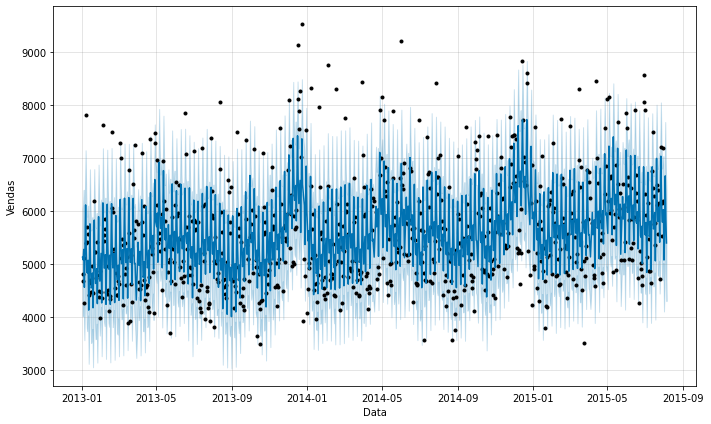

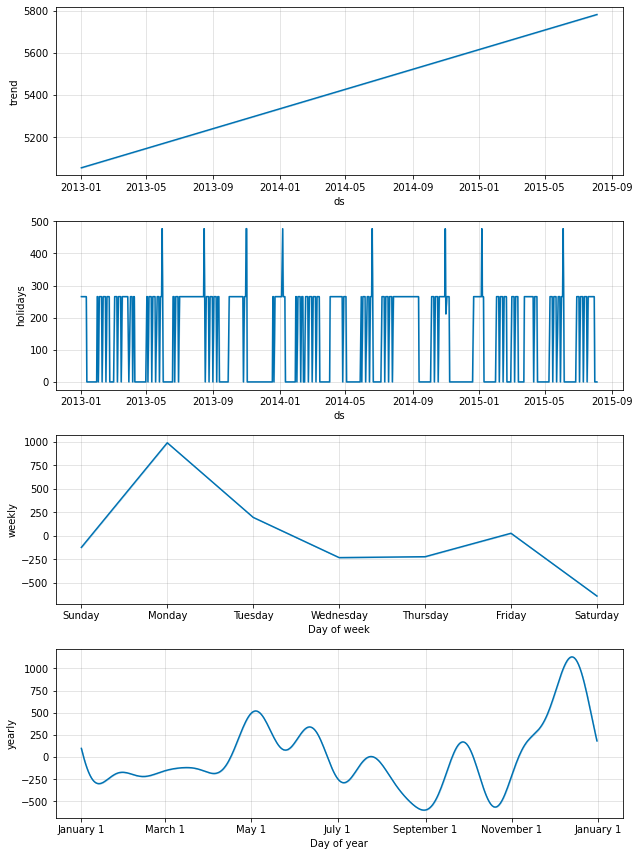

In [ ]:
df_original, df_prediction = sales_prediction(10, sales_train_all_df, school_state_holidays, 5)

In [ ]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,holidays,holidays_lower,holidays_upper,school_holiday,school_holiday_lower,school_holiday_upper,state_holiday,state_holiday_lower,state_holiday_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5054.623831,4012.157520,6039.432246,5054.623831,5054.623831,68.739935,68.739935,68.739935,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,-231.157861,-231.157861,-231.157861,34.395656,34.395656,34.395656,0.0,0.0,0.0,5123.363767
1,2013-01-03,5055.395044,4008.941720,6117.388725,5055.395044,5055.395044,19.621422,19.621422,19.621422,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,-221.725581,-221.725581,-221.725581,-24.155137,-24.155137,-24.155137,0.0,0.0,0.0,5075.016466
2,2013-01-04,5056.166258,4238.876022,6397.291538,5056.166258,5056.166258,215.912637,215.912637,215.912637,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,27.862288,27.862288,27.862288,-77.451792,-77.451792,-77.451792,0.0,0.0,0.0,5272.078895
3,2013-01-05,5056.937471,3557.955939,5648.251700,5056.937471,5056.937471,-499.467146,-499.467146,-499.467146,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,-639.832929,-639.832929,-639.832929,-125.136358,-125.136358,-125.136358,0.0,0.0,0.0,4557.470324
4,2013-01-07,5058.479897,5075.749387,7143.606526,5058.479897,5058.479897,1053.239106,1053.239106,1053.239106,265.50214,265.50214,265.50214,265.50214,265.50214,265.50214,0.0,0.0,0.0,990.574123,990.574123,990.574123,-202.837157,-202.837157,-202.837157,0.0,0.0,0.0,6111.719002
